In [18]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

diabetes=datasets.load_diabetes()

Primero cargamos los datos de la librería

In [48]:
df=pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
df_no_target=df.copy()
df['target']=diabetes['target']
diabetes['feature_names'].append('target')
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Ahora hemos incluido la variable a predecir en el dataframe para poder comparar su distribución a la de los datos. Comprobamos que estos últimos están distribuidos con media 0 y varianza 0.04, mientras que el "target" no sigue esa misma distribución. Sin embargo como el target es una variable de salida y todas las variables de entrada están uniformemente distribuidas consideramos que no hay que escalar nada.

In [52]:
scaler=StandardScaler()
X=scaler.fit_transform(df.values)
#diabetes['feature_names'].pop('target')
#diabetes['feature_names'].remove('target')
XBien=pd.DataFrame(data=X, columns=diabetes['feature_names'])
XBienData=XBien
XTarget=XBienData.pop('target')
XBien.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-9.544904e-18,-4.219852e-17,-5.525997e-17,-4.822688e-17,5.525997e-18,-1.356381e-17,-2.813235e-17,-1.484484e-16,-1.849325e-17,-2.675085e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.990157e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.094666e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818695e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758e+00,2.851075e+00


Volvemos a separar el target del resto de datos

In [41]:
scaler2 = Normalizer()
Y = scaler2.fit_transform(df.values)
YBien = pd.DataFrame(data=Y, columns=diabetes['feature_names']) 
YBien.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.006975,0.003564,-0.007049,-0.001163,-0.011735,-0.000827,-0.005049,-0.013420,-0.010688,-0.003862
std,0.331585,0.369532,0.318052,0.325369,0.293298,0.292618,0.312014,0.291765,0.308803,0.314114
min,-0.799670,-0.714971,-0.759685,-0.787592,-0.610134,-0.590706,-0.586555,-0.502406,-0.746164,-0.719460
25%,-0.258833,-0.326197,-0.260923,-0.250147,-0.255577,-0.233177,-0.248590,-0.280408,-0.253372,-0.230222
50%,0.041672,-0.207803,-0.053714,-0.043878,-0.035496,-0.025873,-0.048940,-0.023901,-0.015389,-0.007490
75%,0.261172,0.358350,0.229349,0.262366,0.207712,0.212679,0.218116,0.235222,0.214579,0.217083
max,0.735380,0.746916,0.877218,0.850339,0.639051,0.639968,0.811158,0.683438,0.729932,0.836427


Esta es la matriz de dispersion para el dataframe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F38C0F8320>,
      dtype=object)

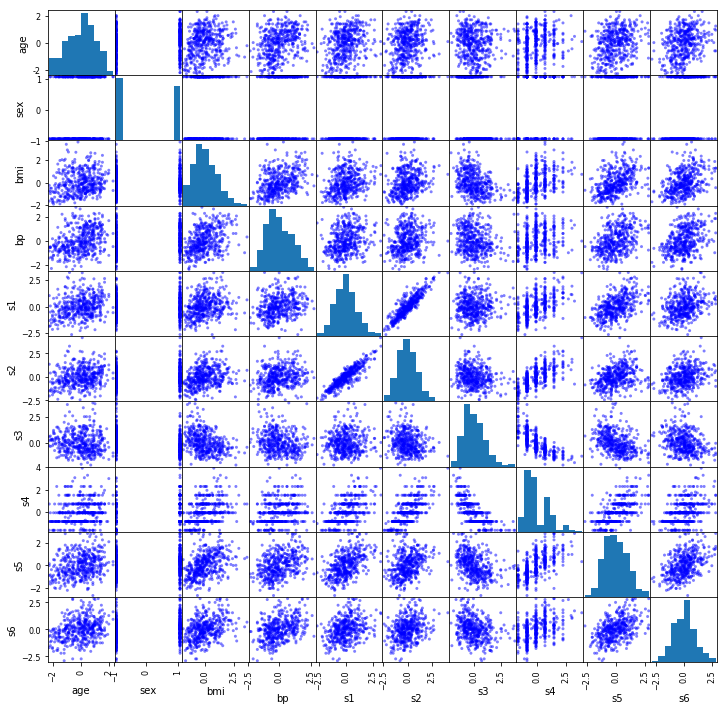

In [42]:
from pandas.plotting import scatter_matrix
XBien.head()
colors = { 'blue'}
scatter_matrix(XBien, figsize = (12, 12), diagonal = 'hist', color=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3895F4A58>,
      dtype=object)

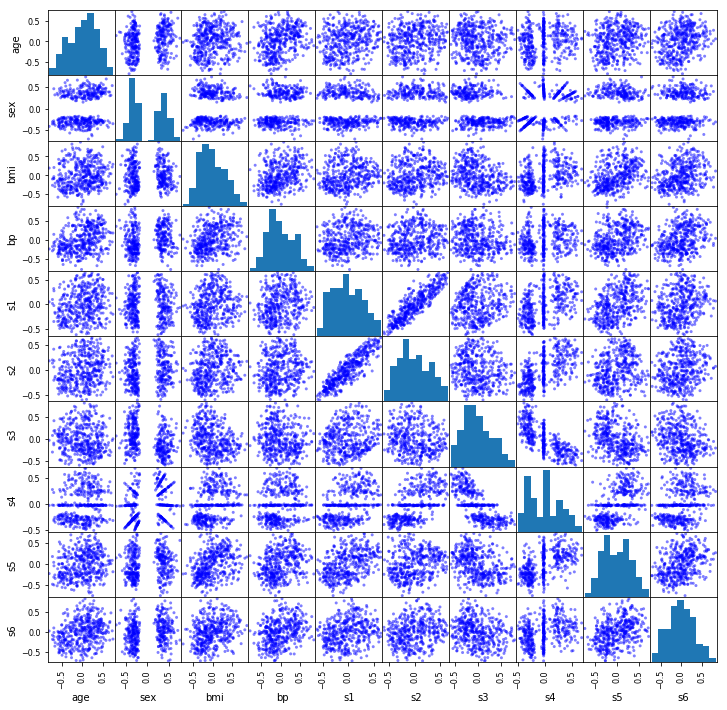

In [35]:
from pandas.plotting import scatter_matrix
YBien.head()
colors = { 'blue'}
scatter_matrix(YBien, figsize = (12, 12), diagonal = 'hist', color=colors)

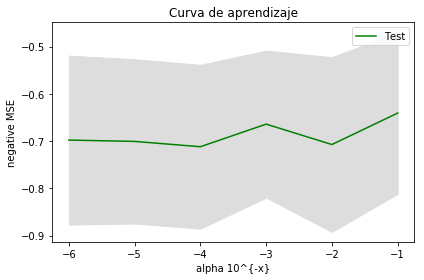

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(200, ), 
                       activation='relu', 
                       solver='adam', 
                       alpha=alpha, 
                       batch_size='auto',
                       max_iter=10000,
                       verbose=False)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, XBienData, XTarget.ravel(), 
                             cv=10, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    

plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

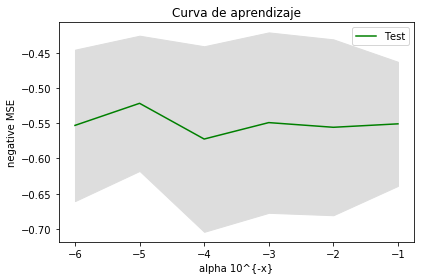

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10,), 
                       activation='relu', 
                       solver='adam', 
                       alpha=alpha, 
                       batch_size='auto',
                       max_iter=10000,
                       verbose=False)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, XBienData, XTarget.ravel(), 
                             cv=10, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()    

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
'''Con la normal(0,1)'''

X_train, X_test, y_train, y_test = train_test_split(XBienData, XTarget, 
                                                    test_size=0.3, random_state=0)
max_iter = 20000
mlpX2 = MLPRegressor(hidden_layer_sizes=(200, ),  # sólo 1 capa oculta de 200 neuronas
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.1,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlpX2.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

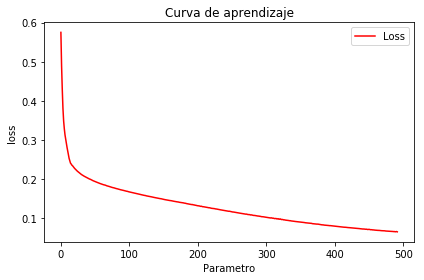

0.9075064058912318
0.17262930202337445


In [98]:

plt.plot(range(0,mlpX2.n_iter_), mlpX2.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento 
#test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlpX2.score(X_train, y_train))
print(mlpX2.score(X_test, y_test))
# Pintar la evolución de la función de loss

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
'''Con la normal(0,1)'''

X_train, X_test, y_train, y_test = train_test_split(XBienData, XTarget, 
                                                    test_size=0.3, random_state=0)
max_iter = 20000
mlpY2 = MLPRegressor(hidden_layer_sizes=(100, 100),  # sólo 1 capa oculta de 200 neuronas
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlpY2.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

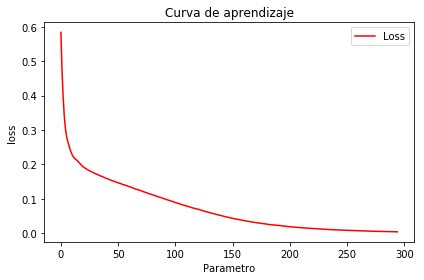

0.9934072427553465
-0.07226304399840333


In [33]:
plt.plot(range(0, mlpY2.n_iter_), mlpY2.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento 
#test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlpY2.score(X_train, y_train))
print(mlpY2.score(X_test, y_test))
# Pintar la evolución de la función de loss

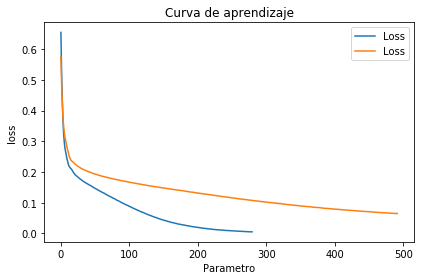

In [105]:
plt.plot(range(0, mlpY2.n_iter_), mlpY2.loss_curve_,mlpX2.loss_curve_,  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  